# Bike Sharing Prediction Model

In [1]:
import pandas as pd
import numpy as np
data_preprocessed=pd.read_csv('bike_sharing_preprocessed.csv')
data_preprocessed.head()

,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,temp,atemp,hum,weather_0,weather_1,weather_2,weather_3,casual,registered,cnt
0,1,0,0,0,1,0,0,0,0,0,...,0.24,0.2879,0.81,0,0,0,0,3,13,16
1,1,0,0,0,1,0,0,0,0,0,...,0.22,0.2727,0.80,1,0,0,0,8,32,40
2,1,0,0,0,1,0,0,0,0,0,...,0.22,0.2727,0.80,0,1,0,0,5,27,32
3,1,0,0,0,1,0,0,0,0,0,...,0.24,0.2879,0.75,0,0,1,0,3,10,13
4,1,0,0,0,1,0,0,0,0,0,...,0.24,0.2879,0.75,0,0,0,1,0,1,1


In [2]:
data_preprocessed.columns.values

array(['season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weekday_7', 'workingday', 'temp', 'atemp', 'hum', 'weather_0',
       'weather_1', 'weather_2', 'weather_3', 'casual', 'registered',
       'cnt'], dtype=object)

As we already know feautur "cnt"is summation of 'casual'and 'registered', therefore these two feautres "'casual'and 'registered'" has no effect on our prediction process and we drop them from df

In [3]:
data_preprocessed=data_preprocessed.drop(['casual'],axis=1)
data_preprocessed=data_preprocessed.drop(['registered'],axis=1)
data_preprocessed.head()

,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weekday_7,workingday,temp,atemp,hum,weather_0,weather_1,weather_2,weather_3,cnt
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0.24,0.2879,0.81,0,0,0,0,16
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0.22,0.2727,0.80,1,0,0,0,40
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0.22,0.2727,0.80,0,1,0,0,32
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0.24,0.2879,0.75,0,0,1,0,13
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0.24,0.2879,0.75,0,0,0,1,1


# We have to make sure our data has no Nan and defective values

In [4]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season_1    17379 non-null  int64  
 1   season_2    17379 non-null  int64  
 2   season_3    17379 non-null  int64  
 3   season_4    17379 non-null  int64  
 4   mnth_1      17379 non-null  int64  
 5   mnth_2      17379 non-null  int64  
 6   mnth_3      17379 non-null  int64  
 7   mnth_4      17379 non-null  int64  
 8   mnth_5      17379 non-null  int64  
 9   mnth_6      17379 non-null  int64  
 10  mnth_7      17379 non-null  int64  
 11  mnth_8      17379 non-null  int64  
 12  mnth_9      17379 non-null  int64  
 13  mnth_10     17379 non-null  int64  
 14  mnth_11     17379 non-null  int64  
 15  mnth_12     17379 non-null  int64  
 16  hour_0      17379 non-null  int64  
 17  hour_1      17379 non-null  int64  
 18  hour_2      17379 non-null  int64  
 19  hour_3      17379 non-nul

# Creating a first Checkpoint

In [5]:
df=data_preprocessed.copy()

In order to have a better overview, let's plot the target feature of data set 'cnt' for first 10 days and as we know each day has 24 hours so for 240 days-hours we illustrait  'cnt' from the start day 01.01.2011 in two dimentions, you may see in this plot the lowest renting counts happens at midnights and the pick happens at the middle of each day

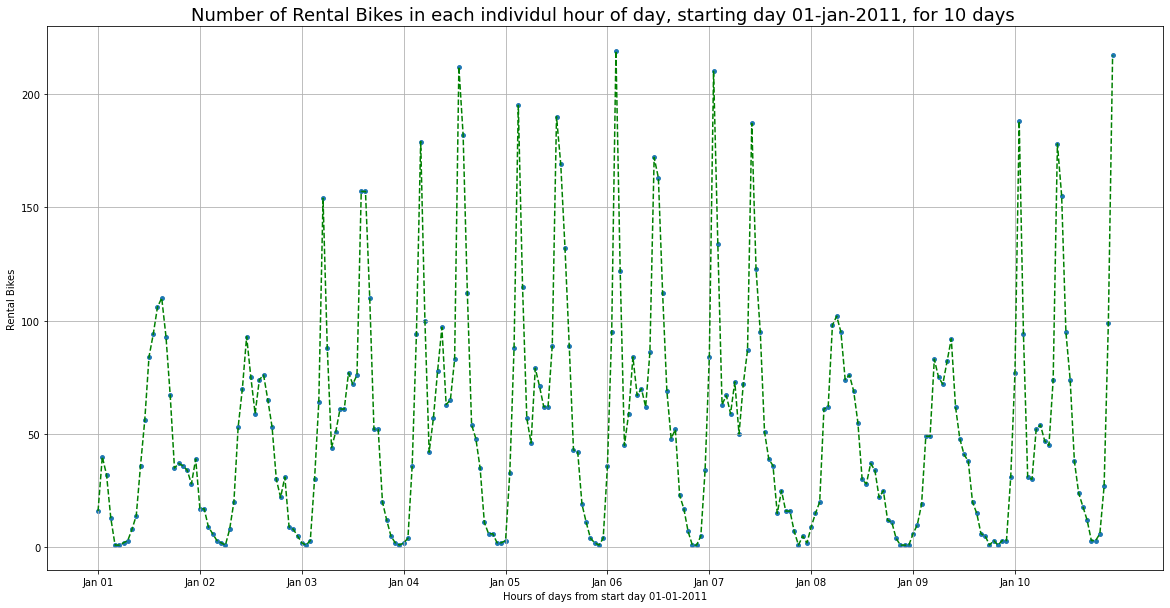

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
t=np.arange(240)
jandays=['Jan 01','Jan 02','Jan 03','Jan 04','Jan 05','Jan 06','Jan 07','Jan 08','Jan 09','Jan 10']
plt.figure(figsize=(20,10))
plt.ylabel('Rental Bikes')
plt.xlabel('Hours of days from start day 01-01-2011')
plt.title('Number of Rental Bikes in each individul hour of day, starting day 01-jan-2011, for 10 days ',fontsize=18)
plt.plot(t,df['cnt'][:240],'g--')
plt.scatter(t,df['cnt'][:240],s=15)
plt.xticks(np.arange(0,240,24),jandays)
plt.grid(True)
plt.show()

# Starting Prediction by choosing input-features

we will use in pandas iloc method for feature selection dataFrame.iloc[row indices,column indices]<br>
We do not select "cnt" from df and we use it as a target for supervised learning

In [25]:
df.shape

(17379, 57)

In [26]:
unscaled_inputs=df.iloc[:,:-1]

In [27]:
targets=df['cnt']

# Standardize the input data

Standardize features by removing the mean and scaling to unit variance
The standard score of a sample x is calculated as:<br>
z = (x - u) / s

In [28]:
from sklearn.preprocessing import StandardScaler
bikesharing_scaler=StandardScaler()
bikesharing_scaler.fit(unscaled_inputs)
scaled_inputs=bikesharing_scaler.transform(unscaled_inputs)
scaled_inputs.shape

(17379, 56)

# Splitting dataset into train & test and shuffle

We suppose 80% of input samples for training our model and 20% for test

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,targets,train_size=0.8,random_state=20)
print(x_train.shape,y_train.shape)

(13903, 56) (13903,)


/Users/macbook/Documents/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:2023: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  warnings.warn("From version 0.21, test_size will always "


In [30]:
print(x_test.shape,y_test.shape)

(3476, 56) (3476,)


# Prediction using Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)
reg.score(x_train,y_train)

0.625230967441471

In [32]:
reg.score(x_test,y_test)

0.6190875323605951

In [33]:
regpred=reg.predict(x_test)

# Creating Summary Table for Linear Regression

Finding the intercept-bias term- and coefficients in regressen equation Y=AX+b, A stands for coefficients matrix, X stands for features or input variables, b is bias term or intercept

In [34]:
reg.intercept_

188.94539197784425

In [35]:
reg.coef_

array([-5.33918141e+11, -5.40855540e+11, -5.44330789e+11, -5.33491379e+11,
        3.49970309e+14,  3.39957194e+14,  3.54826956e+14,  3.50860541e+14,
        3.56460837e+14,  3.51193544e+14,  3.56460837e+14,  3.55045438e+14,
        3.50860541e+14,  3.52410689e+14,  3.50860541e+14,  3.55917421e+14,
       -6.51613789e+12,  1.27191584e+15,  5.47645331e+14,  1.09039294e+15,
       -1.11764174e+14, -6.47737226e+12, -6.51184415e+12, -6.52042826e+12,
       -6.52042826e+12, -6.52042826e+12, -6.52042826e+12, -6.52042826e+12,
       -6.52471527e+12, -6.52899893e+12, -6.52899893e+12, -6.52899893e+12,
       -6.53327924e+12, -6.53327924e+12, -6.52471527e+12, -6.52471527e+12,
       -6.52471527e+12, -6.52471527e+12, -6.52471527e+12, -6.52471527e+12,
       -7.29845514e+13, -1.09915182e+15, -9.42245829e+14, -9.38109035e+14,
       -9.41611706e+14, -9.40976746e+14, -9.43511575e+14, -1.10097596e+15,
       -2.03207548e+14,  1.70000000e+01,  3.95000000e+01, -2.92187500e+01,
       -1.27842339e+15, -

In [36]:
unscaled_inputs.columns

Index(['season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'holiday', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7', 'workingday',
       'temp', 'atemp', 'hum', 'weather_0', 'weather_1', 'weather_2',
       'weather_3'],
      dtype='object')

In [37]:
feature_name=unscaled_inputs.columns
summary_table=pd.DataFrame(columns=['feature_name'],data=feature_name)
summary_table['coefficients']=np.transpose(reg.coef_)
summary_table

,feature_name,coefficients
0,season_1,-5.339181e+11
1,season_2,-5.408555e+11
2,season_3,-5.443308e+11
3,season_4,-5.334914e+11
4,mnth_1,3.499703e+14
5,mnth_2,3.399572e+14
6,mnth_3,3.548270e+14
7,mnth_4,3.508605e+14
8,mnth_5,3.564608e+14
9,mnth_6,3.511935e+14


Adding bias term or intercept

In [38]:
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',reg.intercept_]
summary_table=summary_table.sort_index()
summary_table

,feature_name,coefficients
0,Intercept,1.889454e+02
1,season_1,-5.339181e+11
2,season_2,-5.408555e+11
3,season_3,-5.443308e+11
4,season_4,-5.334914e+11
5,mnth_1,3.499703e+14
6,mnth_2,3.399572e+14
7,mnth_3,3.548270e+14
8,mnth_4,3.508605e+14
9,mnth_5,3.564608e+14


# Interpreting the coefficients and understanding which features has most effect on our prediction

In [39]:
summary_table['Odds_ratio']=np.exp(summary_table.coefficients)
summary_table.sort_values('Odds_ratio',ascending=False)
summary_table

/Users/macbook/Documents/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,feature_name,coefficients,Odds_ratio
0,Intercept,1.889454e+02,1.142723e+82
1,season_1,-5.339181e+11,0.000000e+00
2,season_2,-5.408555e+11,0.000000e+00
3,season_3,-5.443308e+11,0.000000e+00
4,season_4,-5.334914e+11,0.000000e+00
5,mnth_1,3.499703e+14,inf
6,mnth_2,3.399572e+14,inf
7,mnth_3,3.548270e+14,inf
8,mnth_4,3.508605e+14,inf
9,mnth_5,3.564608e+14,inf


Those features are not significant and very important if :
1- the corresponding coefficient is near to zero (this feauture has no effect)
2- Odds_Ratio near to one (it means we do not have a change)

# It is obvious Linear Regression is not a good idea for modeling our data set :-) 

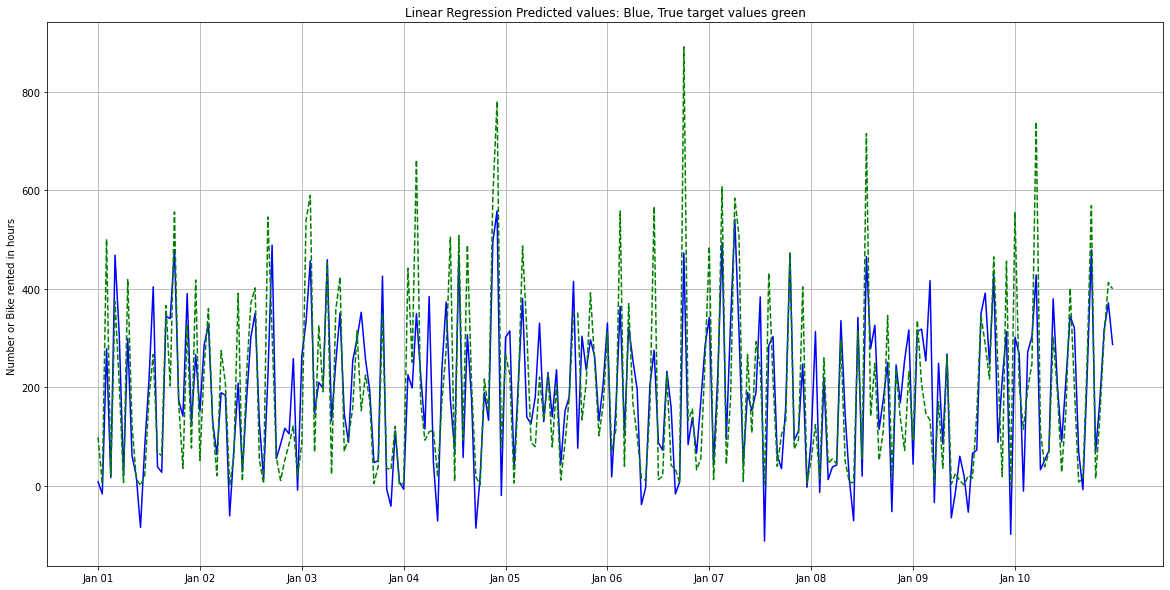

In [48]:
t=np.arange(240)
plt.figure(figsize=(20,10))
plt.ylabel('Number or Bike rented in hours ')
plt.title('Linear Regression Predicted values: Blue, True target values green')
plt.plot(t,regpred[:240],'b-',t,y_test[:240],'g--')
jandays=['Jan 01','Jan 02','Jan 03','Jan 04','Jan 05','Jan 06','Jan 07','Jan 08','Jan 09','Jan 10']
plt.xticks(np.arange(0,240,24),jandays)
plt.grid(True)
plt.show()

# Prediction using Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
ranfor = RandomForestRegressor(n_estimators=10)
ranfor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
ranfor.score(x_train, y_train)

0.966681687480869

In [52]:
ranfor.score(x_test,y_test)

0.8063660817756949

In [53]:
ranforpred=ranfor.predict(x_test)

In [54]:
from sklearn.metrics import mean_absolute_error, r2_score
print("Mean Absolute Error (MAE) : {}".format(mean_absolute_error(y_test, ranforpred)))
print("R2: {}".format(r2_score(y_test, ranfor.predict(x_test))))

Mean Absolute Error (MAE) : 51.476498232779875
R2: 0.8063660817756949


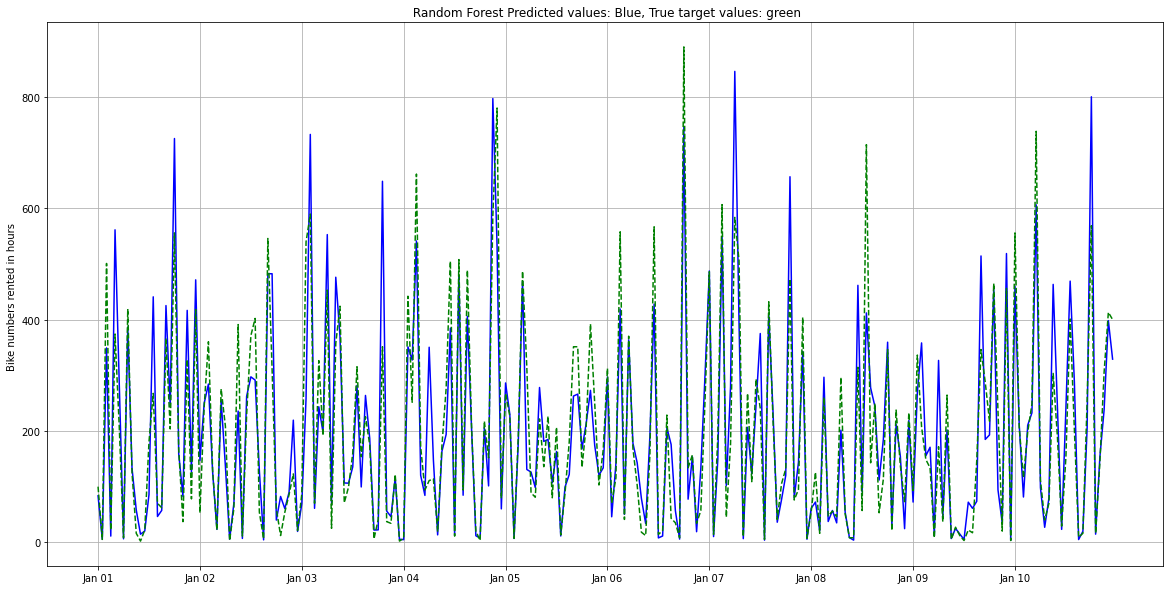

In [58]:
t=np.arange(240)
plt.figure(figsize=(20,10))
plt.ylabel('Bike numbers rented in hours ')
plt.title(' Random Forest Predicted values: Blue, True target values: green')
plt.plot(t,ranforpred[:240],'b-',t,y_test[:240],'g--')
jandays=['Jan 01','Jan 02','Jan 03','Jan 04','Jan 05','Jan 06','Jan 07','Jan 08','Jan 09','Jan 10']
plt.xticks(np.arange(0,240,24),jandays)
plt.grid(True)
plt.show()

# Prediction using Polynomial Regression

The implementation of polynomial regression is a two-step process. First, we transform our data into a polynomial using the PolynomialFeatures function from sklearn and then use linear regression to fit the parameters we call this procedure as a pipline

In [59]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
polyreg=Pipeline(Input)
polyreg.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('modal', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [60]:
polyregpred=polyreg.predict(x_test)

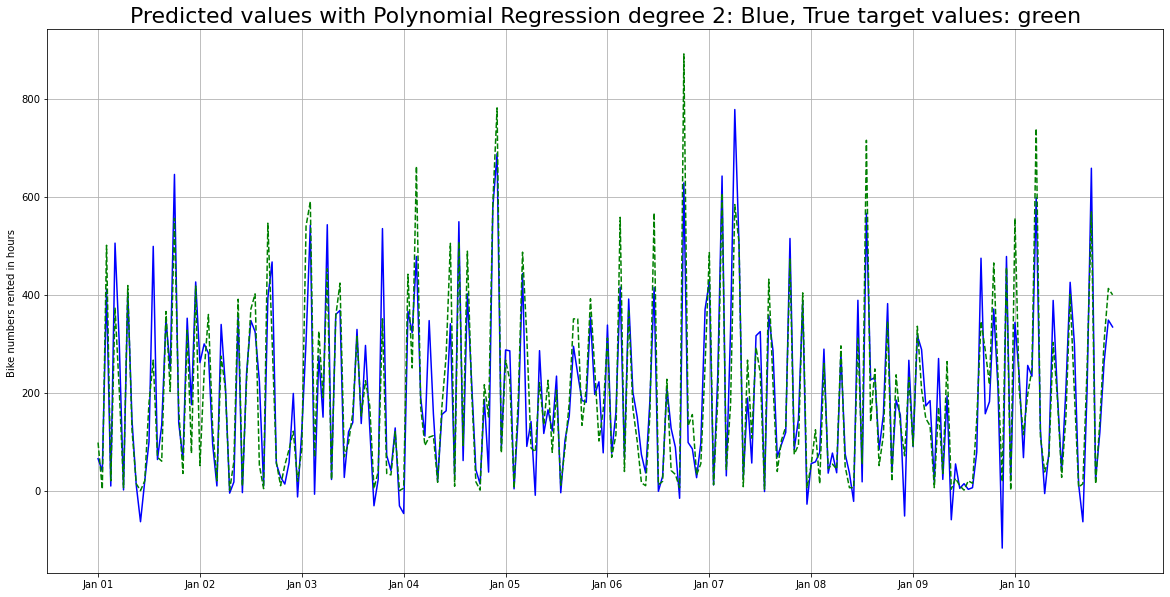

In [62]:
degree=2
t=np.arange(240)
plt.figure(figsize=(20,10))
plt.ylabel('Bike numbers rented in hours ')
plt.title('Predicted values with Polynomial Regression degree {}: Blue, True target values: green'.format(degree),fontsize=22)
plt.plot(t,polyregpred[:240],'b-',t,y_test[:240],'g--')
jandays=['Jan 01','Jan 02','Jan 03','Jan 04','Jan 05','Jan 06','Jan 07','Jan 08','Jan 09','Jan 10']
plt.xticks(np.arange(0,240,24),jandays)
plt.grid(True)
plt.show()

In [63]:
from sklearn.metrics import mean_absolute_error, r2_score
print("Mean Absolute Error (MAE) : {}".format(mean_absolute_error(y_test, polyregpred)))
print("R2: {}".format(r2_score(y_test, polyregpred)))

Mean Absolute Error (MAE) : 55.15085586881473
R2: 0.8203667902237454


# Visualization: Comparison between different models

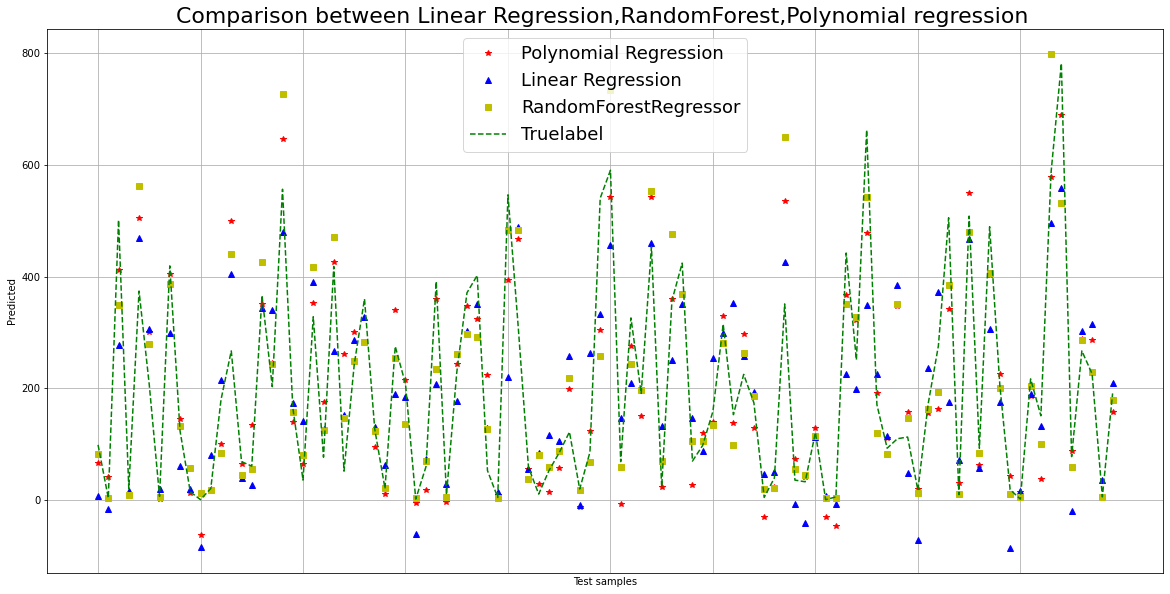

In [65]:
t=np.arange(100)
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(t,polyregpred[:100], 'r*', label='Polynomial Regression')
plt.plot(t,regpred[:100], 'b^', label='Linear Regression')
plt.plot(t,ranforpred[:100], 'ys', label='RandomForestRegressor')
plt.plot(t,y_test[:100], 'g--', label='Truelabel')
#plt.plot(pred4, 'gd', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Predicted')
plt.xlabel('Test samples')
plt.legend(loc="best")
plt.title('Comparison between Linear Regression,RandomForest,Polynomial regression ',fontsize=22)
plt.xticks(np.arange(0,100,10))
plt.grid(True)
plt.gca().legend(prop={'size': 18})
plt.show()

# We may conclude RandomForestRegression model has better performance comparing with other models therefore we save it

In [67]:
import pickle
with open('model','wb') as file:#the name of the file will be model, the writing method would be write bite
    pickle.dump(ranfor,file) 
with open('scaler','wb') as file:
    pickle.dump(bikesharing_scaler, file)

End of Modeling 